In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import lec5_graphs as gfx

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [7]:
df = pd.read_csv('earnings.csv').drop('Unnamed: 0',axis=1)

In [8]:
df.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
0,50000.0,6,2,1,1,2,16,45,74,45,2,3,1
1,60000.0,5,6,2,1,2,16,32,66,58,3,3,0
2,30000.0,5,4,2,1,2,16,61,64,29,1,3,0
3,51000.0,5,3,2,1,2,17,51,63,39,2,3,0
4,9000.0,5,4,2,1,2,15,64,64,26,1,3,0


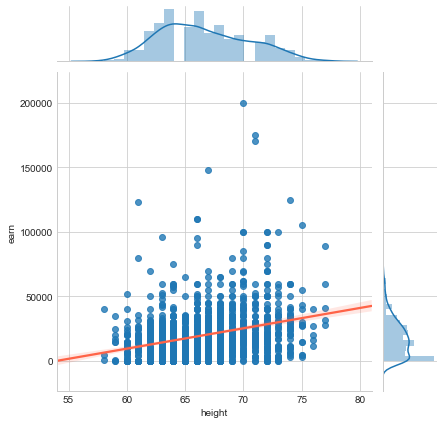

In [11]:
sns.jointplot(df['height'],df['earn'], kind='reg', line_kws={'color':'tomato'})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 13 columns):
earn            1374 non-null float64
height1         1374 non-null int64
height2         1374 non-null int64
sex             1374 non-null int64
race            1374 non-null int64
hisp            1374 non-null int64
ed              1374 non-null int64
yearbn          1374 non-null int64
height          1374 non-null int64
age             1374 non-null int64
age_category    1374 non-null int64
eth             1374 non-null int64
male            1374 non-null int64
dtypes: float64(1), int64(12)
memory usage: 139.6 KB


In [13]:
categorical_columns = ['sex','race','hisp','age_category','eth','male']

for cat in categorical_columns:
    print('\n', cat)
    print(df[cat].value_counts())
    print(df[cat].value_counts('%'))


 sex
2    856
1    518
Name: sex, dtype: int64
2    0.622999
1    0.377001
Name: sex, dtype: float64

 race
1    1216
2     126
3      17
4      10
9       5
Name: race, dtype: int64
1    0.885007
2    0.091703
3    0.012373
4    0.007278
9    0.003639
Name: race, dtype: float64

 hisp
2    1294
1      80
Name: hisp, dtype: int64
2    0.941776
1    0.058224
Name: hisp, dtype: float64

 age_category
1    564
2    436
3    374
Name: age_category, dtype: int64
1    0.410480
2    0.317322
3    0.272198
Name: age_category, dtype: float64

 eth
3    1144
1     126
2      77
4      27
Name: eth, dtype: int64
3    0.832606
1    0.091703
2    0.056041
4    0.019651
Name: eth, dtype: float64

 male
0    856
1    518
Name: male, dtype: int64
0    0.622999
1    0.377001
Name: male, dtype: float64


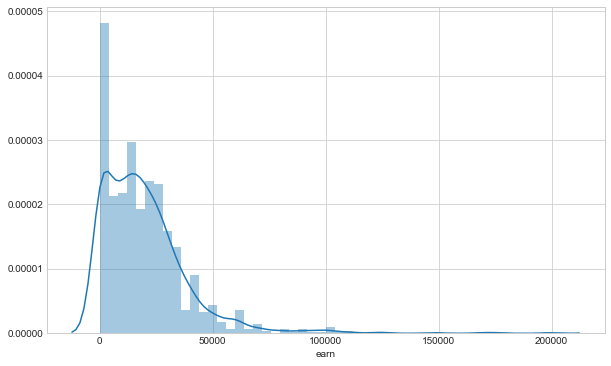

In [15]:
sns.distplot(df['earn'])

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

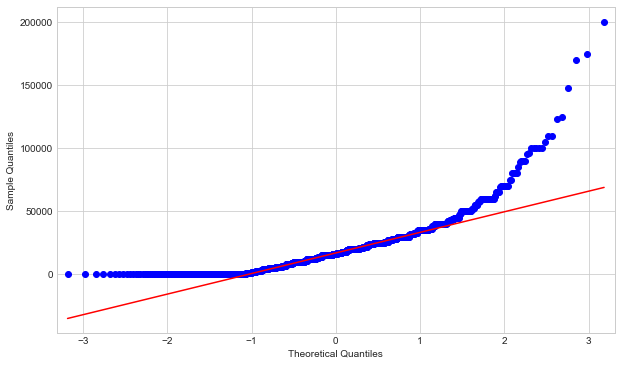

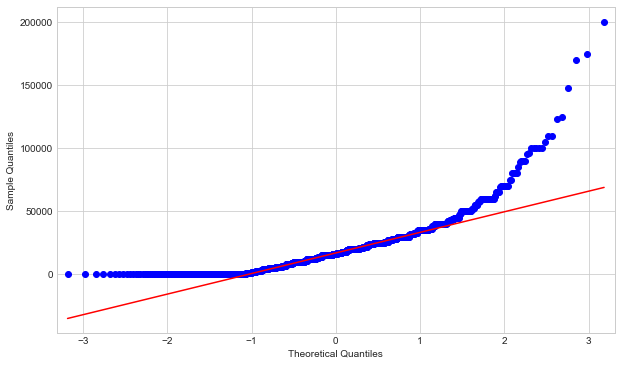

In [17]:
sm.qqplot(df['earn'], line='q')

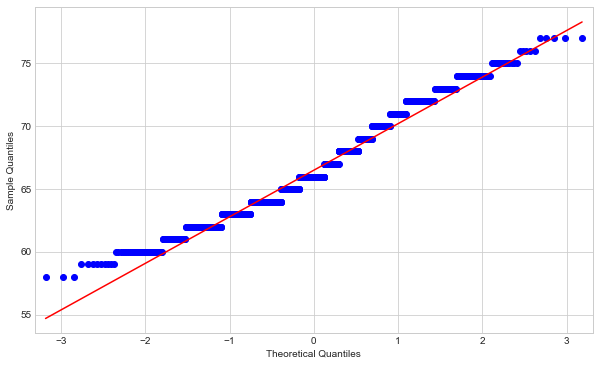

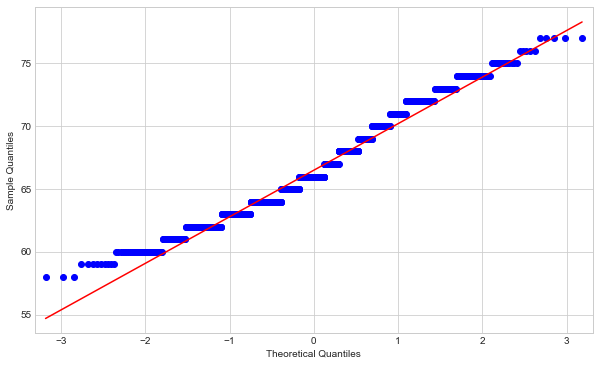

In [18]:
sm.qqplot(df['height'], line='q')

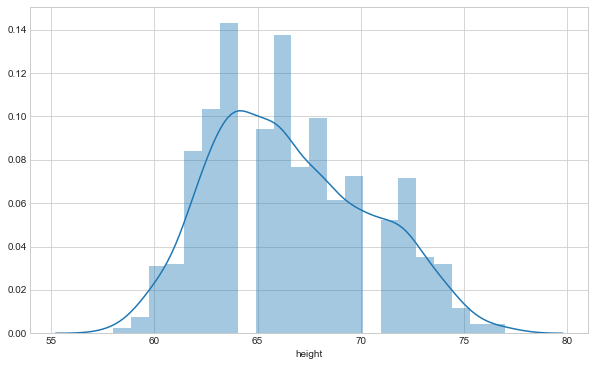

In [19]:
sns.distplot(df['height'])

In [21]:
modelo = smf.ols('earn ~ height', df)

In [22]:
modelo = modelo.fit()

In [24]:
modelo.params

Intercept   -84868.101530
height        1574.410254
dtype: float64

In [25]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     138.4
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           1.65e-30
Time:                        13:16:06   Log-Likelihood:                -15475.
No. Observations:                1374   AIC:                         3.095e+04
Df Residuals:                    1372   BIC:                         3.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.487e+04   8926.986     -9.507      0.000   -1.02e+05   -6.74e+04
height      1574.4103    133.829     11.764      0.000    1311.879    1836.942
==============================================================================
Omnibus:                      868.584   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13733.247
Skew:                           2.677   Prob(JB):                         0.00
Kurtosis:                      17.533   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

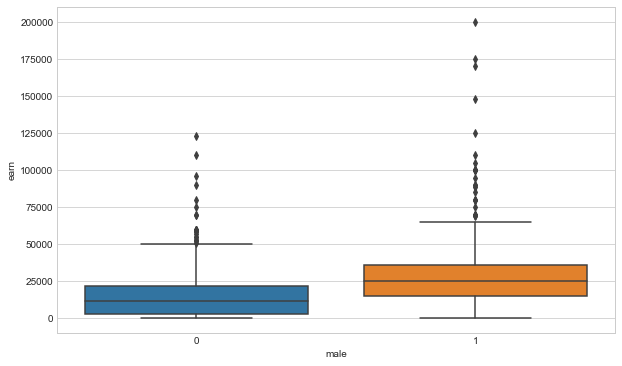

In [26]:
sns.boxplot(x=df['male'],y=df['earn'])

In [28]:
modelo_binario_male = smf.ols('earn ~ male', df).fit()

In [29]:
modelo_binario_male.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           1.95e-41
Time:                        15:15:47   Log-Likelihood:                -15450.
No. Observations:                1374   AIC:                         3.090e+04
Df Residuals:                    1372   BIC:                         3.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.456e+04    632.986     23.004      0.000    1.33e+04    1.58e+04
male        1.438e+04   1030.915     13.946      0.000    1.24e+04    1.64e+04
==============================================================================
Omnibus:                      864.521   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13531.216
Skew:                           2.664   Prob(JB):                         0.00
Kurtosis:                      17.421   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""